In [3]:
import msprime
import sys
import numpy as np
import seaborn as sns
from IPython.display import SVG
import matplotlib.pyplot as plt
from itertools import chain

In [16]:
#Reference Population
pop_configs = [
    msprime.PopulationConfiguration(sample_size=100),
    msprime.PopulationConfiguration(sample_size=100),]
M = np.array([
    [0  ,0.1],
    [0.3,  0]
])
mutation_rate=0.2
ts_ref = msprime.simulate(
    population_configurations=pop_configs, migration_matrix=M,mutation_rate=mutation_rate, random_seed=15)

In [27]:
#ABC Function
def ABC(data,eps,pop_configs,populations,mutation_rate,prior_distribution="exponential",prior_parameters=1,iterations=1000):
    ref_stat = (data.f2(populations))
    parameter1_samples = []
    parameter2_samples = []
    norm_mean = 0
    if prior_distribution == "uniform":
        for iter in range(0,iterations):
            parameter1_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            parameter2_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            M = np.array([[0,parameter1_sim],
                          [parameter2_sim,0]])
            ts_sim = msprime.simulate(population_configurations=pop_configs, migration_matrix=M,mutation_rate=mutation_rate)
            sim_stat = (ts_sim.f2(populations))
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                parameter1_samples.append(parameter1_sim)
                parameter2_samples.append(parameter2_sim)
            #elif eps < np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
             #   norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    if prior_distribution == "beta":
        for iter in range(0,iterations):
            parameter1_sim = np.random.beta(prior_parameters[0],prior_parameters[1])
            parameter2_sim = np.random.beta(prior_parameters[0],prior_parameters[1])
            M = np.array([[0,parameter1_sim],
                          [parameter2_sim,0]])
            ts_sim = msprime.simulate(population_configurations=pop_configs, migration_matrix=M,mutation_rate=mutation_rate)
            sim_stat = (ts_sim.f2(populations))
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                parameter1_samples.append(parameter1_sim)
                parameter2_samples.append(parameter2_sim)
            #elif eps < np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
             #   norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    return(parameter1_samples,parameter2_samples)

In [34]:
#Beta(1,3) prior 
iterations = 100000
eps = 0.05
populations=[range(0,100),range(100,200)]
prior_distribution = "beta"
prior_parameters = (1,3)
attempt1 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,populations=populations,mutation_rate=mutation_rate,prior_distribution=prior_distribution,prior_parameters=prior_parameters,iterations=iterations)


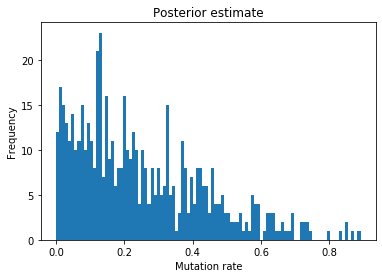

Acceptance probability : 0.0563


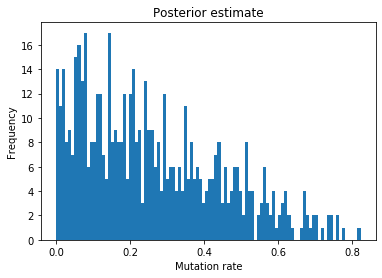

In [35]:
plt.hist(attempt1[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt1[0])/iterations)
plt.hist(attempt1[1], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()

In [36]:
#Uniform(0,1) prior 
iterations = 100000
eps = 0.05
populations=[range(0,100),range(100,200)]
prior_distribution = "uniform"
prior_parameters = (0,1)
attempt2 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,populations=populations,mutation_rate=mutation_rate,prior_distribution=prior_distribution,prior_parameters=prior_parameters,iterations=iterations)


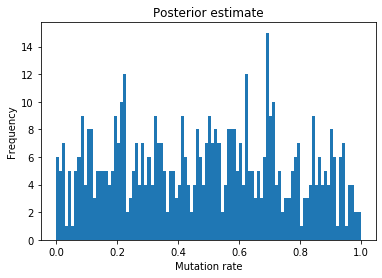

Acceptance probability : 0.0543


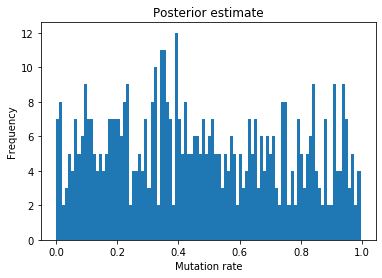

In [37]:
plt.hist(attempt2[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt2[0])/iterations)
plt.hist(attempt2[1], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()